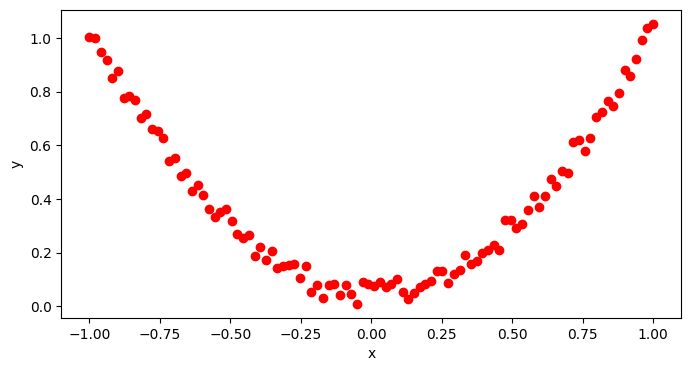

In [1]:
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
from torch.optim import Adam, LBFGS, SGD
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
%matplotlib inline


torch.manual_seed(1234)

### Input data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
# torch.unsqueeze: Returns a new tensor
# with a dimension of size one inserted at the specified position.
y = torch.square(x)
# Add Random Noise
y = y + 0.1*torch.rand(y.size())

# Plot the data
plt.figure(figsize=(8,4))

x_plot, y_plot = x.numpy(), y.numpy()
plt.scatter(x_plot, y_plot, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show("Data for Regression Analysis")
plt.show()

Doing Iterations: 0 and Loss: 0.2131779044866562
Doing Iterations: 50 and Loss: 0.001272618188522756
Doing Iterations: 100 and Loss: 0.0006695330375805497
Doing Iterations: 150 and Loss: 0.0006333320634439588


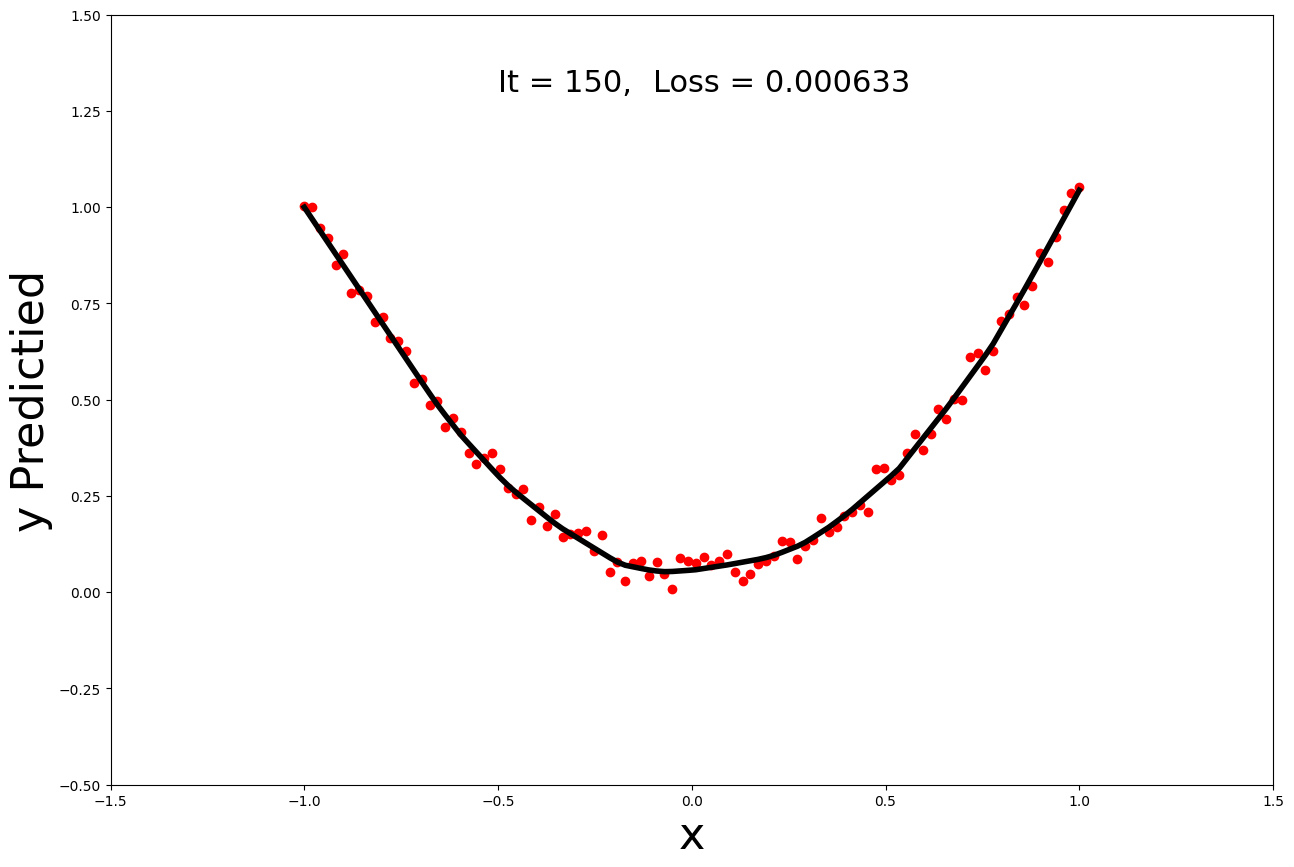

In [2]:
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
from torch.optim import Adam, LBFGS, SGD
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
%matplotlib inline


torch.manual_seed(1234)

### Input data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
# torch.unsqueeze: Returns a new tensor
# with a dimension of size one inserted at the specified position.
y = torch.square(x)
# Add Random Noise
y = y + 0.1*torch.rand(y.size())



# Convert x and y to tracked variables
x = Variable(x)
y = Variable(y)

Net = torch.nn.Sequential(
      torch.nn.Linear(1, 100),
      torch.nn.LeakyReLU(),
      torch.nn.Linear(100, 1))

optimizer = torch.optim.Adam(Net.parameters(), lr = 0.01)
loss_function = torch.nn.MSELoss()

image_list = []
Niter = 150 + 1

fig, ax = plt.subplots(figsize=(15,10))

for it in range(Niter):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()    # Zero Out the gradient
    optimizer.step()
    if it % 50 == 0:
        print(f"Doing Iterations: {it} and Loss: {loss}")
    plt.cla()
    ax.set_xlabel('x', fontsize=32)
    ax.set_ylabel('y Predictied', fontsize=32)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.scatter(x_plot, y_plot, color = "red")
    ax.plot(x_plot, y_pred.data.numpy(), 'k-', lw=4)
    ax.text(-0.5, 1.3, 'It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
    ax.text(-0.1, 1.3, 'Loss = %.6f' % loss.data.numpy(),
            fontdict={'size': 22, 'color':  'black'})

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    image_list.append(image)



imageio.mimsave('./Parabolic_regression_1.gif', image_list, fps=5)